In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Saving kaggle.json to kaggle.json
 86% 57.0M/66.0M [00:00<00:00, 68.9MB/s]
100% 66.0M/66.0M [00:00<00:00, 104MB/s] 
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,precision_score,recall_score,roc_auc_score,make_scorer
from matplotlib.colors import Normalize
import pandas as pd
from pandas.core.frame import DataFrame 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler,BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
def metric(y_test,y_pred):
    cm=confusion_matrix(y_test, y_pred)
    tp=cm[1][1] #vrai positifs 
    tn=cm[0][0] #vrai negatifs
    fp=cm[0][1] #faux positifs
    fn=cm[1][0] #faux negatifs
    score=(2*((tp+tn)/y_test.size) + 5*(tp/(fn+tp)))/7 #(2*accuracy + 5*rappel)/7
#     print(f"score : {score} soit {score* 100:.2f}%")
    return float(score)

In [4]:
def decision_tree_classification(X_tr,y_tr,X_ts,y_ts):
      dt_classifier = DecisionTreeClassifier(max_depth=5)
      dt_classifier.fit(X_tr, y_tr)
      y_pred = dt_classifier.predict(X_ts)
      #performances
      print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
      print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
      print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
      print('roc_auc_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
      print('metrique personnalisée (MP): {}'.format(metric(y_ts,y_pred)))
      print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
      sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
      plt.title('Matrice de confusion', y=1.1, fontsize = 22)
      plt.xlabel('Prédit',fontsize = 18)
      plt.ylabel('Réel',fontsize = 18)
      plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

********** decision_tree_classification APRES RUS **********
Precision : 0.02574
Recall : 0.89109
F1 : 0.05004
roc_auc_score : 0.91559
metrique personnalisée (MP): 0.9050672606522416
\\Matrice de confusion ///:- 
 [[53455  3406]
 [   11    90]]


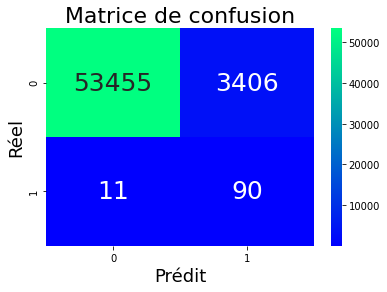

********** decision_tree_classification APRES ROS **********
Precision : 0.07665
Recall : 0.86139
F1 : 0.14078
roc_auc_score : 0.92148
metrique personnalisée (MP): 0.8956632394995507
\\Matrice de confusion ///:- 
 [[55813  1048]
 [   14    87]]


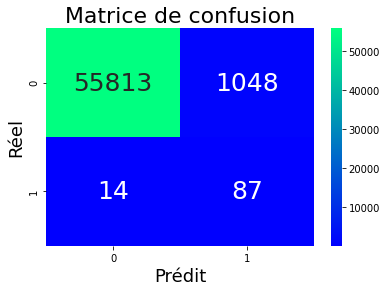

********** decision_tree_classification APRES SMOTE **********
Precision : 0.02844
Recall : 0.91089
F1 : 0.05516
roc_auc_score : 0.92781
metrique personnalisée (MP): 0.9205407391622208
\\Matrice de confusion ///:- 
 [[53718  3143]
 [    9    92]]


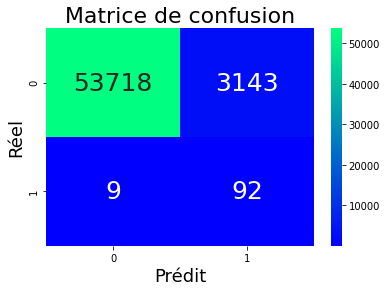

********** decision_tree_classification APRES ADASYN SMOTE **********
Precision : 0.01872
Recall : 0.93069
F1 : 0.03670
roc_auc_score : 0.92202
metrique personnalisée (MP): 0.9257467210453759
\\Matrice de confusion ///:- 
 [[51934  4927]
 [    7    94]]


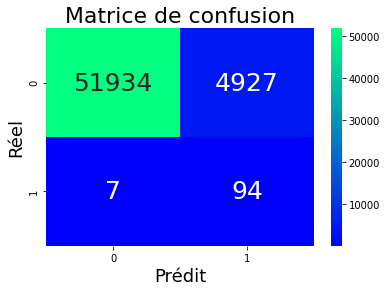

********** decision_tree_classification APRES BORDERLINE SMOTE **********
Precision : 0.07686
Recall : 0.87129
F1 : 0.14125
roc_auc_score : 0.92635
metrique personnalisée (MP): 0.9026952482825966
\\Matrice de confusion ///:- 
 [[55804  1057]
 [   13    88]]


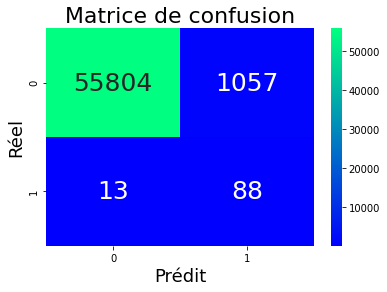

In [6]:
df = pd.read_csv('creditcard.csv').astype(np.float32)
Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))
x = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#ré-echantillonnage des données d'apprentissage 
rus=RandomUnderSampler() #SOUS-ECHANTILLONNAGE ALEATOIRE
X_train_rus, y_train_rus = rus.fit_sample(X_train, Y_train)

ros=RandomOverSampler() #SUR-ECHANTILLONNAGE ALEATOIRE
X_train_ros, y_train_ros = ros.fit_sample(X_train, Y_train)

smt=SMOTE() #SMOTE
X_train_smt, y_train_smt = smt.fit_sample(X_train, Y_train)

ada=ADASYN() #ADASYN-SMOTE
X_train_ada, y_train_ada = ada.fit_sample(X_train, Y_train)

Bl=BorderlineSMOTE() #BORDERLINE-SMOTE
X_train_Bl, y_train_Bl = Bl.fit_sample(X_train, Y_train)

print("*"*10,"decision_tree_classification APRES RUS","*"*10)
decision_tree_classification(X_train_rus,y_train_rus,X_test,Y_test)
print("*"*10,"decision_tree_classification APRES ROS","*"*10)
decision_tree_classification(X_train_ros,y_train_ros,X_test,Y_test)
print("*"*10,"decision_tree_classification APRES SMOTE","*"*10)
decision_tree_classification(X_train_smt,y_train_smt,X_test,Y_test)
print("*"*10,"decision_tree_classification APRES ADASYN SMOTE","*"*10)
decision_tree_classification(X_train_ada,y_train_ada,X_test,Y_test)
print("*"*10,"decision_tree_classification APRES BORDERLINE SMOTE","*"*10)
decision_tree_classification(X_train_Bl,y_train_Bl,X_test,Y_test)